In [3]:
# add src to path
import sys

sys.path.append("../")

import torch
torch.manual_seed(88)

from torchvision.datasets import CIFAR10
from generalization.randomization import RandomizedDataset
from matplotlib import pyplot as plt

def image_grid(data, idxs):
    fig, axs = plt.subplots(2, 5, figsize=(10, 5))

    for i, idx in enumerate(idxs):
        out = data[idx]

        if len(out) == 3:
            img, label, corrupted_label = out
        else:
            img, label = out
            corrupted_label = label

        # print(img.shape)
        axs[i // 5, i % 5].imshow(img.permute(1, 2, 0))
        axs[i // 5, i % 5].set_title(data.classes[corrupted_label])
        axs[i // 5, i % 5].axis("off")

    fig.show()

def image_grid_comparision(data, idxs):
    fig, axs = plt.subplots(5, 2, figsize=(5, 10))

    for i, idx in enumerate(idxs[:5]):
        out = data[idx]

        if len(out) == 3:
            img, label, corrupted_perm = out
        else:
            img, label = out
            # corrupted_label = label

        permutation_as_img = corrupted_perm.repeat(3, 1).view(3, -1).long()
        permutated_img = img.view(3, -1).gather(1, permutation_as_img).view(3, 32, 32)

        # show original and permutated image side by side
        axs[i, 0].imshow(img.permute(1, 2, 0))
        axs[i, 0].set_title(data.classes[label])
        axs[i, 0].axis("off")

        axs[i, 1].imshow(permutated_img.permute(1, 2, 0))
        axs[i, 1].set_title(data.classes[label])
        axs[i, 1].axis("off")
        
    fig.show()

# Exploration of Corrupted Data

The experiments in this paper are based mainly on exploring the effect of different types of corruption on the performance of the models. The following sections describe the different types of corruption used in the experiments.

| **Experiment Name** | **Description** |
| --------------- | ----------- |
| **True Labels**                | Original dataset without modification |
| **Partially Corrupted Labels** | Independently with probability p, the label of each image is corrupted as a uniform random class |
| **Random Labels**              | All the labels are replaced with random ones |
| **Shuffled Pixels**            | A random permutation of the pixels is chosen and then the same permutation is applied to all the images in both training and test set |
| **Random Pixels**              | A different random permutation is applied to each image independently |
| **Gaussian**                   | A Gaussian distribution (with matching mean and variance to the original image dataset) is used to generate random pixels for each image |


In [4]:
RandomizedDataset?

Init signature:
RandomizedDataset(
    dataset=None,
    data=None,
    targets=None,
    corruption_name=None,
    corruption_prob=0.0,
    apply_corruption=False,
    train=True,
    transform=None,
    target_transform=None,
)
Docstring:     
Dataset that applies Randomization Attacks as shown in https://arxiv.org/abs/1611.03530.

Args:
    dataset (torch.utils.data.Dataset): Dataset to be randomized
    data (torch.Tensor): Data tensor
    targets (torch.Tensor): Target tensor
    corruption_name (str): Name of the corruption to be applied
    corruption_prob (float): Probability of corruption
    apply_corruption (bool): If True, the corruption is applied to the returned image
    train (bool): If True, the dataset is used for training
    transform (callable, optional): A function/transform that takes in an PIL image and returns a transformed version. E.g, ``transforms.RandomCrop``
    target_transform (callable, optional): A function/transform that takes in the target and transf

## 1. True Data

Files already downloaded and verified


/home/step/Code/projects/rethinking_generalization/Generalization/notebooks/../generalization/randomization/dataset.py:231: UserWarning: corruption_prob is not provided, using default value of 0.0
  warnings.warn(


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/cifar10
    Split: Train, Corruption: None
CIFAR10 Shape: torch.Size([3, 32, 32])


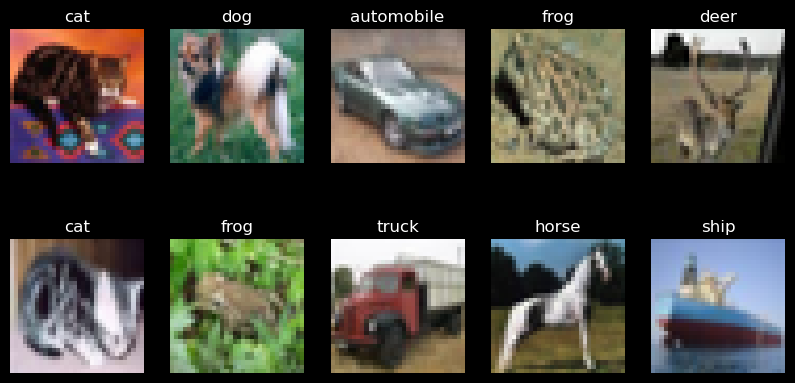

In [5]:
import numpy as np

cifar = RandomizedDataset(CIFAR10(root="./data/cifar10", download=True))
random_idxs = np.random.choice(len(cifar), 10)

print(repr(cifar))

image_grid(cifar, random_idxs)
print("CIFAR10 Shape:", cifar[0][0].size())

## 2. Partially Corrupted Labels

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/cifar10
    Split: Train, Corruption: partial_labels


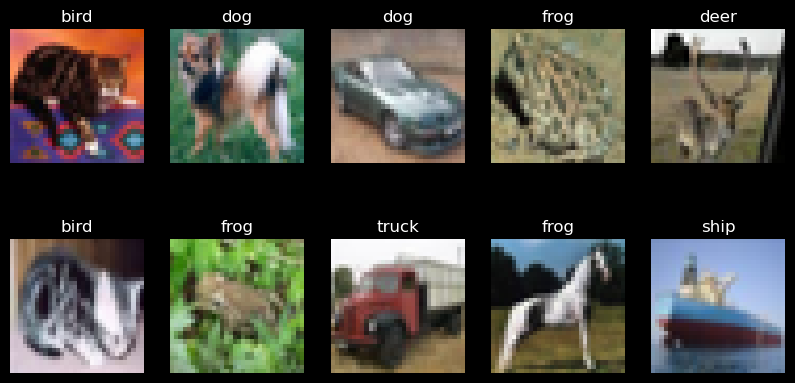

In [6]:
cifar_partial_labels = RandomizedDataset(
    CIFAR10(root="./data/cifar10", download=True),
    corruption_name="partial_labels",
    corruption_prob=0.5,
)

print(repr(cifar_partial_labels))
image_grid(cifar_partial_labels, random_idxs)

## 3. Random Labels

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/cifar10
    Split: Train, Corruption: random_labels


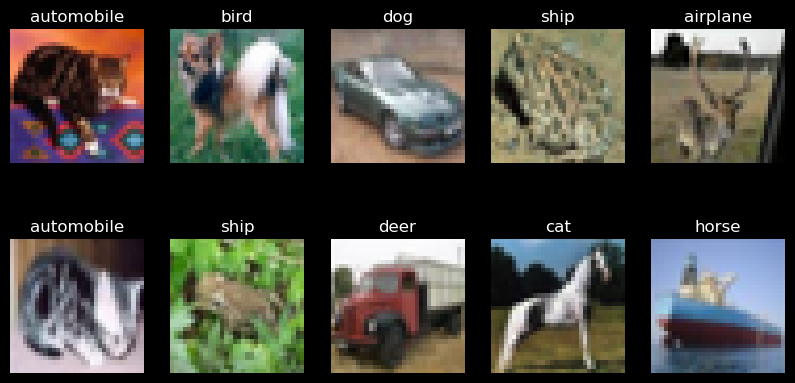

In [7]:
cifar_random_labels = RandomizedDataset(
    CIFAR10(root="./data/cifar10", download=True),
    corruption_name="random_labels",
)
print(repr(cifar_random_labels))
image_grid(cifar_random_labels, random_idxs)

## 4. Shuffled Pixels


Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/cifar10
    Split: Train, Corruption: shuffled_pixels


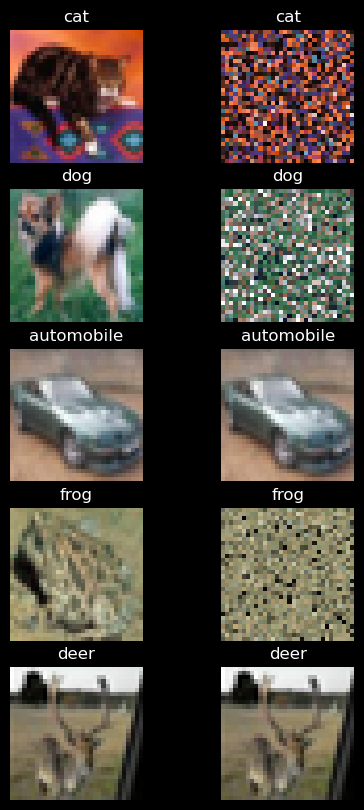

In [8]:
torch.manual_seed(88)

cifar_shuffled_pixels = RandomizedDataset(
    CIFAR10(root="./data/cifar10", download=True),
    corruption_name="shuffled_pixels",
    corruption_prob=0.6,
    apply_corruption=False
)

print(repr(cifar_shuffled_pixels))

image_grid_comparision(cifar_shuffled_pixels, random_idxs)

## 5. Random Pixels

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/cifar10
    Split: Train, Corruption: random_pixels


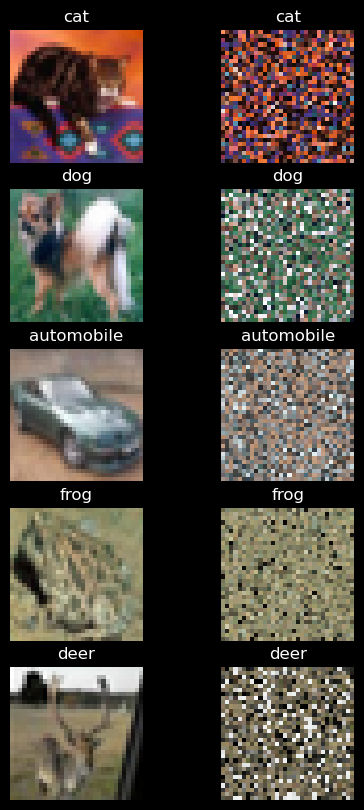

In [9]:
torch.manual_seed(88)

cifar_random_labels = RandomizedDataset(
    CIFAR10(root="./data/cifar10", download=True),
    corruption_name="random_pixels",
    apply_corruption=False,
)

print(repr(cifar_random_labels))
image_grid_comparision(cifar_random_labels, random_idxs)

## 6. Gaussian Noise